# **TITANIC SURVIVAL PREDICTION**

#         **CODSOFT INTERNSHIP PROJECT**

# **BY- PRAJJWAL PANDEY**

           Importing the necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

           Importing the Dataset

In [3]:
import pandas as pd
df = pd.read_csv(r"E:\tested.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


           Data Preprocessing

In [5]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)

df['FamilySize'] = df['SibSp'] + df['Parch']
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
df['Title'] = df['Title'].replace(['Lady', 'Countess', 'Dona'], 'Royalty')
df['Title'] = df['Title'].replace(['Mlle', 'Ms'], 'Miss')
df['Title'] = df['Title'].replace(['Mme'], 'Mrs')

df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

df = pd.get_dummies(df, columns=['Sex', 'Embarked', 'Title'], drop_first=True)

           Spliting the data into Training and Testing sets

In [7]:
X = df.drop('Survived', axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

          Feauture Scaling

In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

            Feature Selection

In [9]:
selector = SelectKBest(f_classif, k=10)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

             Initializing and training the models with hyperparameter tuning

In [10]:
random_forest = RandomForestClassifier(random_state=42)
gradient_boosting = GradientBoostingClassifier(random_state=42)

param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2]
}

grid_search_rf = GridSearchCV(estimator=random_forest, param_grid=param_grid_rf, cv=StratifiedKFold(n_splits=5), n_jobs=-1)
grid_search_rf.fit(X_train_selected, y_train)
best_rf_model = grid_search_rf.best_estimator_

grid_search_gb = GridSearchCV(estimator=gradient_boosting, param_grid=param_grid_gb, cv=StratifiedKFold(n_splits=5), n_jobs=-1)
grid_search_gb.fit(X_train_selected, y_train)
best_gb_model = grid_search_gb.best_estimator_

            Voting Classifier Ensemble

In [12]:
cv_scores = cross_val_score(voting_classifier, X_train_selected, y_train, cv=StratifiedKFold(n_splits=5))
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

Cross-Validation Scores: [1. 1. 1. 1. 1.]
Mean CV Score: 1.0


           Making predictions

In [13]:
y_pred = voting_classifier.predict(X_test_selected)

           Evaluating the Model

In [14]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        31

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84

Confusion Matrix:
 [[53  0]
 [ 0 31]]


In [15]:
feature_importances = best_rf_model.feature_importances_
feature_names = X.columns

           Correlation Matrix Heatmap

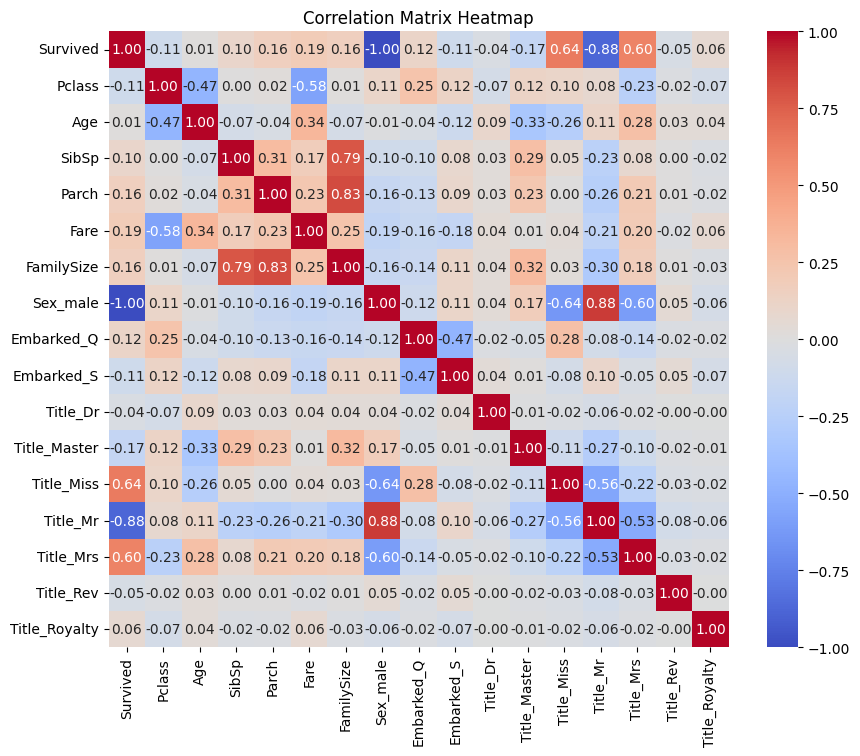

In [17]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

             Age Distribution by Survival

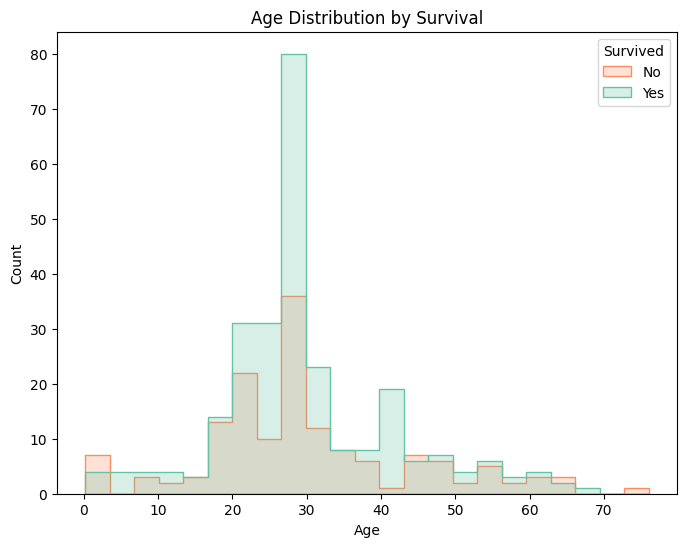

In [18]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Age', hue='Survived', element='step', common_norm=False, palette='Set2')
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

             Survival Rate by Family Size

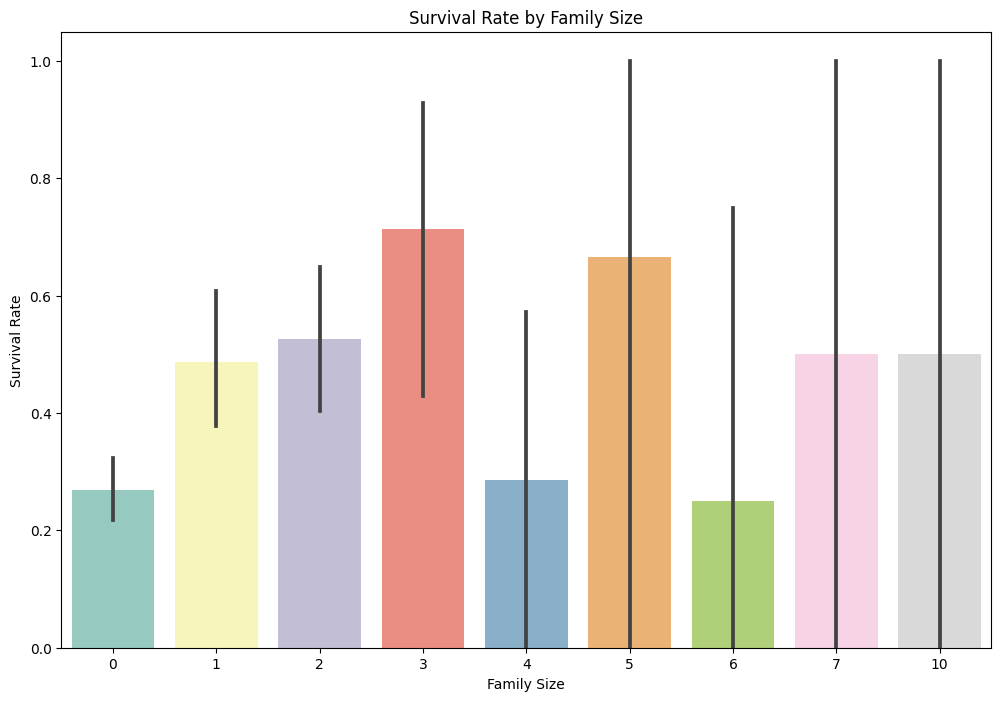

In [19]:
plt.figure(figsize=(12, 8))
sns.barplot(x='FamilySize', y='Survived', data=df, palette='Set3')
plt.title('Survival Rate by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')
plt.show()

               Fare Distribution by Class and Survival

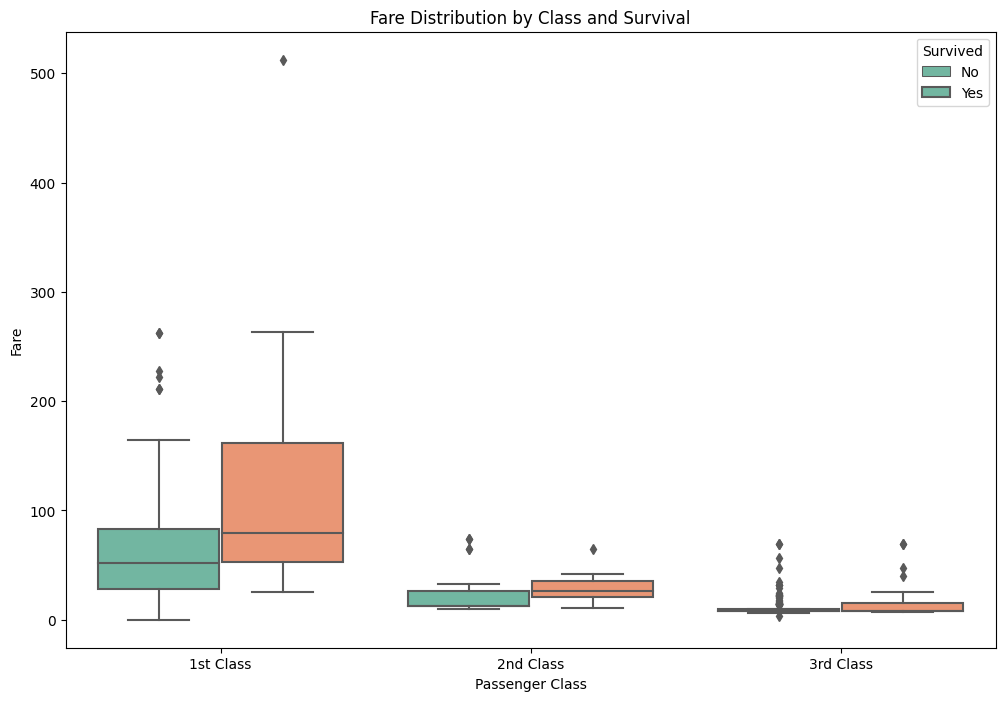

In [20]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Pclass', y='Fare', hue='Survived', data=df, palette='Set2')
plt.title('Fare Distribution by Class and Survival')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.xticks([0, 1, 2], ['1st Class', '2nd Class', '3rd Class'])
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

          Pair Plot of Features

c:\Users\HURSH\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


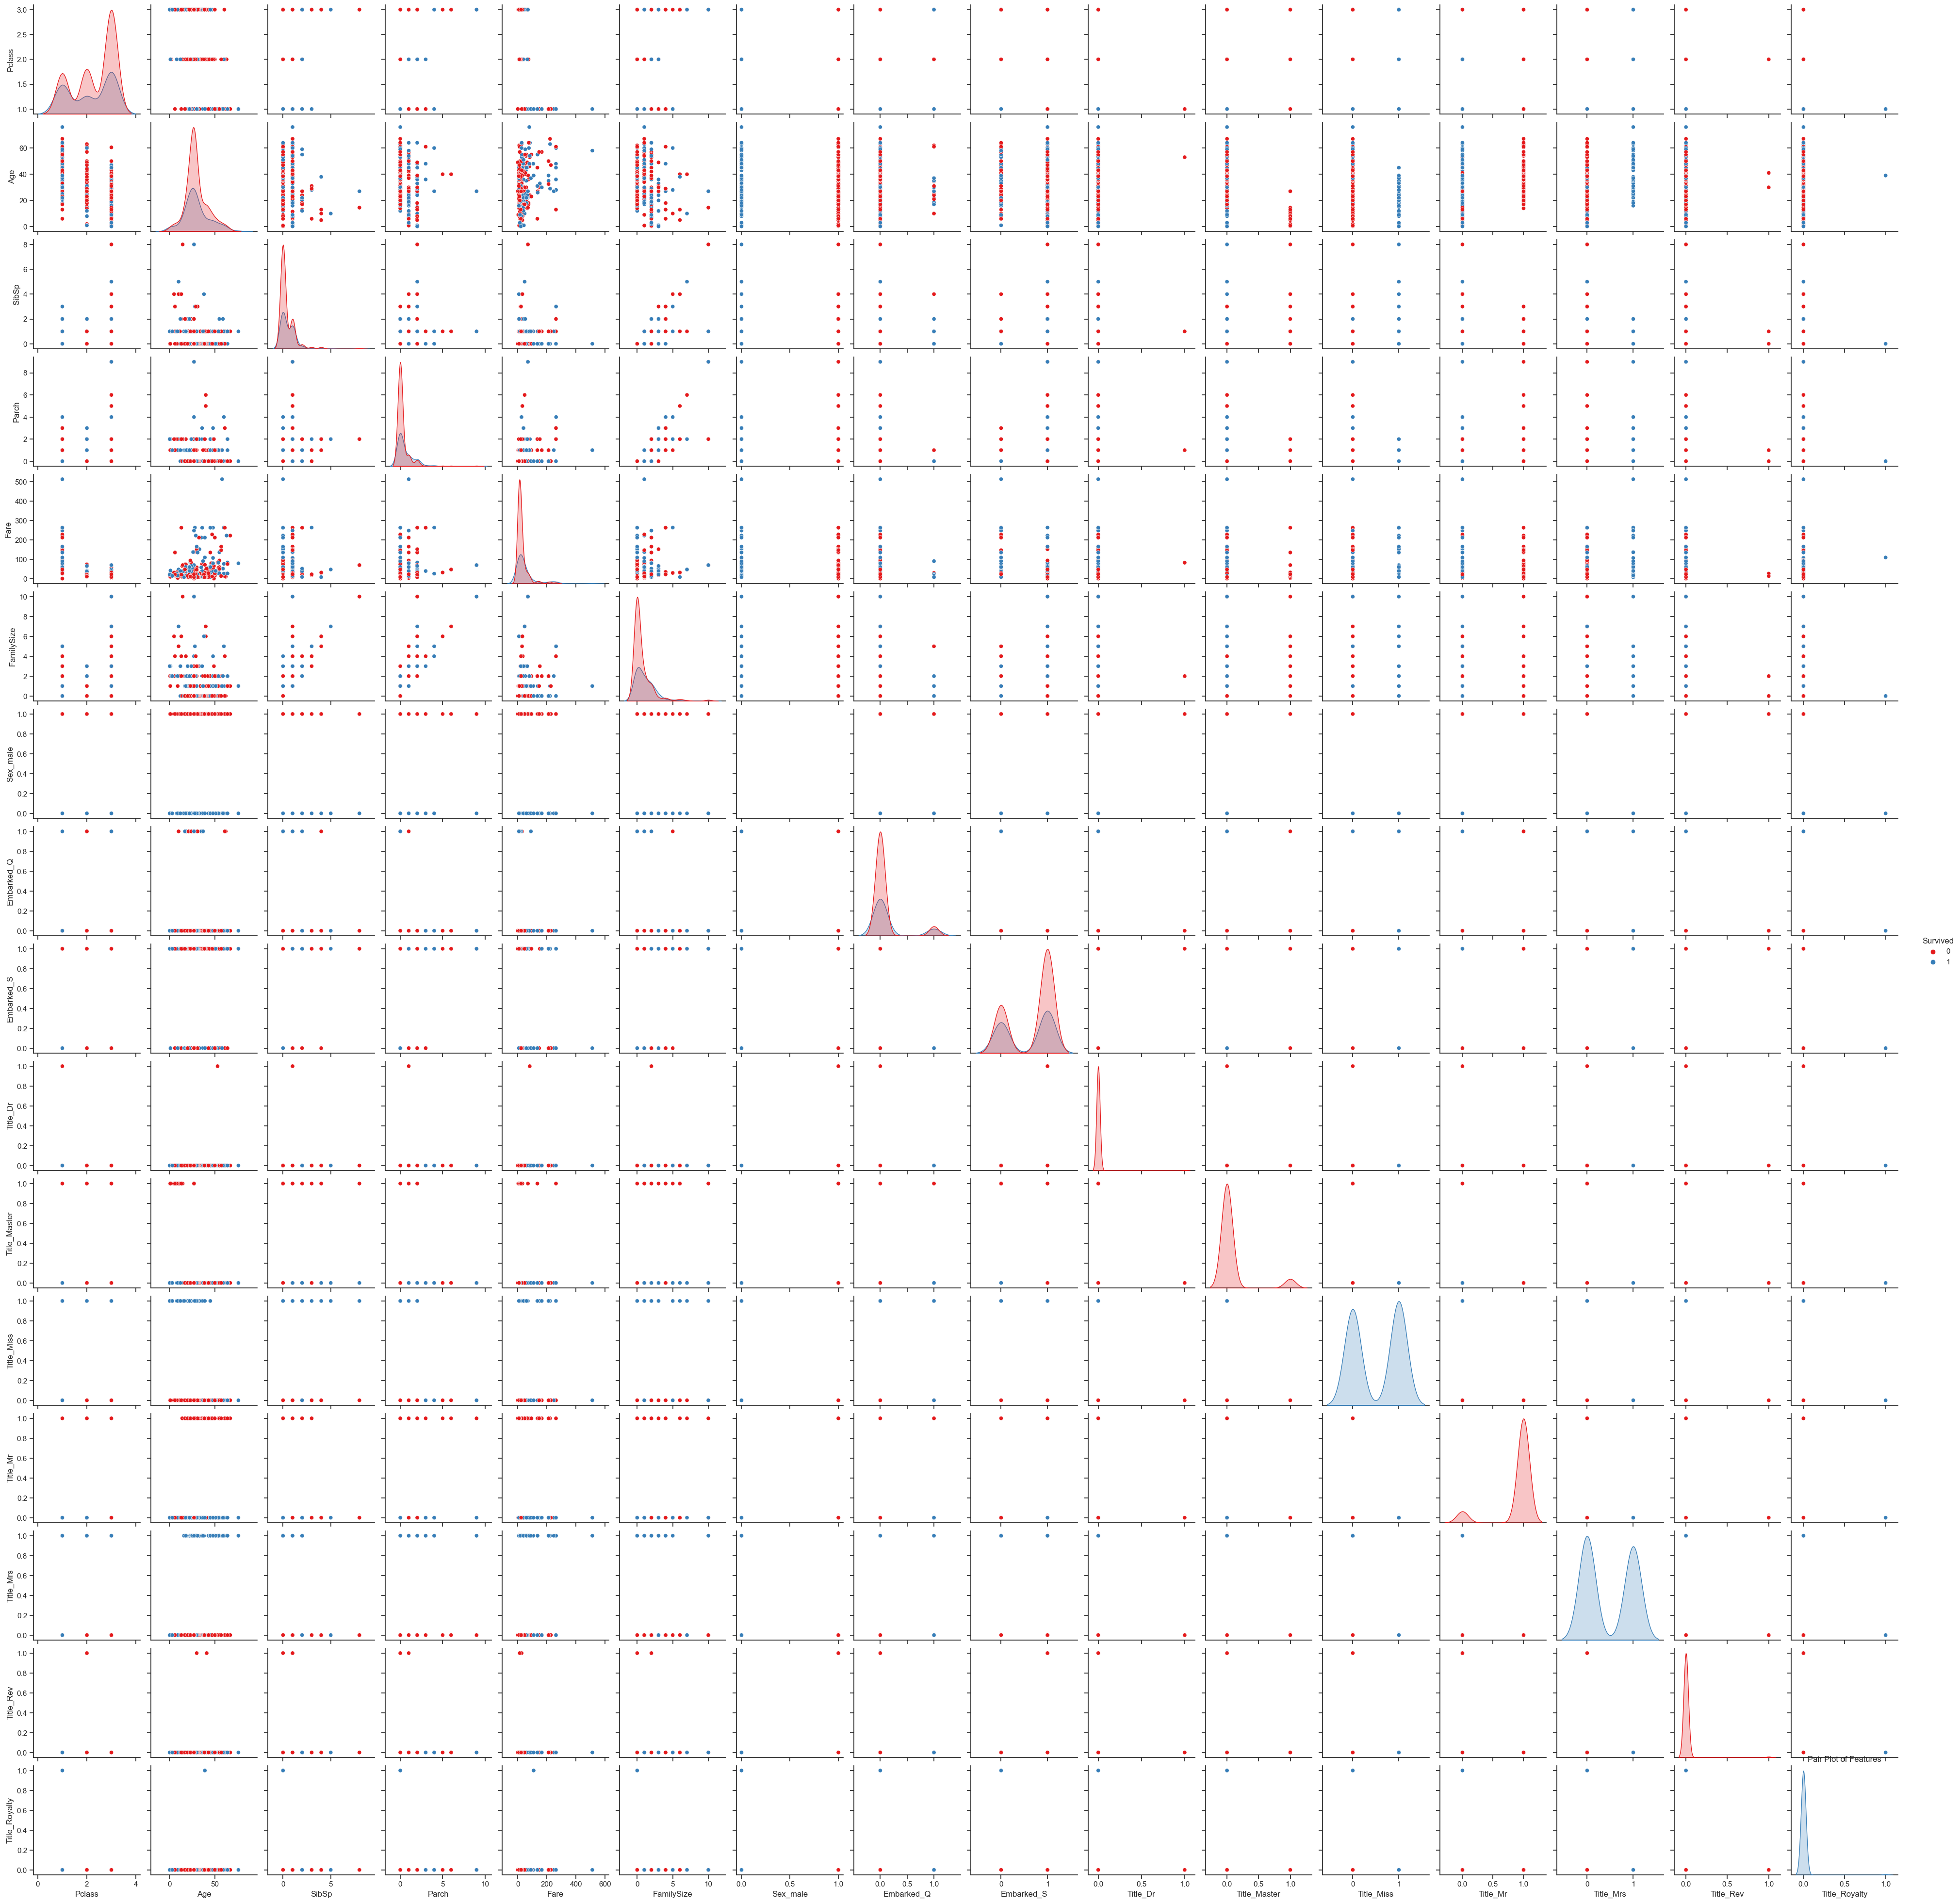

In [21]:
sns.set(style="ticks")
sns.pairplot(data=df, hue='Survived', palette='Set1')
plt.title('Pair Plot of Features')
plt.show()